In [1]:
import pandas as pd 

# load the dataset
df = pd.read_csv(r"C:\Users\sangi\OneDrive\Desktop\spam detection project\malicious_phish.csv")

# Display the first few rows
print(df.head())


                                                 url        type
0                                   br-icloud.com.br    phishing
1                mp3raid.com/music/krizz_kaliko.html      benign
2                    bopsecrets.org/rexroth/cr/1.htm      benign
3  http://www.garage-pirenne.be/index.php?option=...  defacement
4  http://adventure-nicaragua.net/index.php?optio...  defacement


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Extract URLs and LABELS or Types
x = df['url']
y = df['type'] #categories: phishing, benign, defacement, malware

#convert text(URLs) into numerical from using TF-IDF
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(x)

In [3]:
from sklearn.preprocessing import LabelEncoder

#convert labels into numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

#mapping of labels (for reference)
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)


{'benign': 0, 'defacement': 1, 'malware': 2, 'phishing': 3}


In [4]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state = 42)

In [5]:
x0= x_train.shape
x1=x_test.shape
y0=y_train.shape
y1=y_test.shape
print (f"x_train={x0}, x_test={x1}, y_train={y0}, y_test={y1}")

x_train=(520952, 590757), x_test=(130239, 590757), y_train=(520952,), y_test=(130239,)


In [6]:
print(type(x_train))
print(x_train[:5])  # Show first few entries to check format


<class 'scipy.sparse._csr.csr_matrix'>
  (0, 431807)	0.21643367852625203
  (0, 268778)	0.2503331231464975
  (0, 573401)	0.30125512854857844
  (0, 573320)	0.2836841633059079
  (0, 552052)	0.8480910524630725
  (1, 322624)	0.16201822685631345
  (1, 431807)	0.2066726269214328
  (1, 539582)	0.3687747895138418
  (1, 328404)	0.3730907284474455
  (1, 477730)	0.8098425664370245
  (2, 431807)	0.21643367852625203
  (2, 268778)	0.2503331231464975
  (2, 573401)	0.30125512854857844
  (2, 573320)	0.2836841633059079
  (2, 262391)	0.8480910524630725
  (3, 226457)	0.07694848182500476
  (3, 235751)	0.34895035621486226
  (3, 577480)	0.2861225804576583
  (3, 472018)	0.3985911896879564
  (3, 331113)	0.3457545855170271
  (3, 464413)	0.7155594168842211
  (4, 226457)	0.08663332369120315
  (4, 322611)	0.23887709558265896
  (4, 383278)	0.49618042611491564
  (4, 506770)	0.8302032192015575


In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# Ensure x_train is raw text before applying CountVectorizer
if isinstance(x_train, list) or isinstance(x_train[0], str):  
    count = CountVectorizer(max_df=0.97, max_features=4000)
    x_train_transformed = count.fit_transform(x_train)
    x_test_transformed = count.transform(x_test)
else:
    print("x_train is already vectorized. Skipping CountVectorizer.")


x_train is already vectorized. Skipping CountVectorizer.


In [8]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV

In [9]:
from sklearn.linear_model import LogisticRegression
# train the model
model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [11]:
from sklearn.metrics import accuracy_score

#predict on training and test data 
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

#compute accuracy 
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)

print(f"Training Acurracy: {train_accuracy:.4f}")
print(f"Testing Acurracy: {test_accuracy:.4f}")

Training Acurracy: 0.9625
Testing Acurracy: 0.9488


Classification Report:
               precision    recall  f1-score   support

      benign       0.94      0.99      0.96     85778
  defacement       0.99      0.99      0.99     19104
     malware       0.99      0.95      0.97      6521
    phishing       0.92      0.73      0.81     18836

    accuracy                           0.95    130239
   macro avg       0.96      0.91      0.93    130239
weighted avg       0.95      0.95      0.95    130239



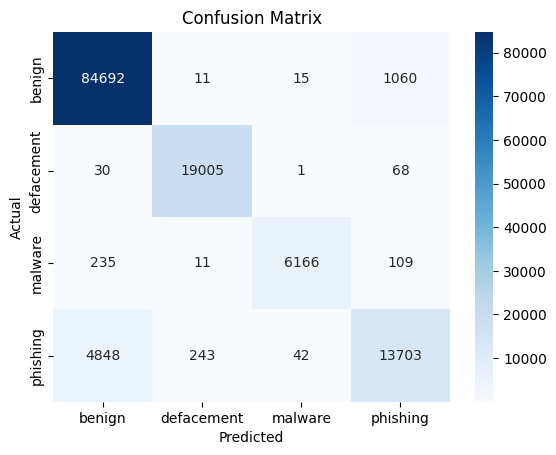

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
#generate the classification report
print("Classification Report:\n",classification_report(y_test, y_test_pred, target_names = label_encoder.classes_))

#generate the confusion matrix 
import seaborn as sns 
import matplotlib.pyplot as plt 

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot= True, fmt="d", cmap="Blues",xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [14]:
result_value={f"training_accuracy":[],"testing_accuracy":[]}
model_name=[]

In [16]:

result_value["training_accuracy"].append(train_accuracy)
result_value["testing_accuracy"].append(test_accuracy)
model_name.append("LogisticRegression")

In [17]:
result_value

{'training_accuracy': [0.9624821480673843],
 'testing_accuracy': [0.948763427237617]}

In [19]:
import joblib

# Save the model
joblib.dump(model, "model.pkl")
print("Model saved successfully!")


Model saved successfully!


In [20]:
# load the model from the file 

loaded_model = joblib.load ('model.pkl')

#Verify by making predictions 
y_test_pred = loaded_model.predict(x_test)
print("Loaded model test accuracy:",accuracy_score(y_test, y_test_pred))

Loaded model test accuracy: 0.948763427237617
